In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


SETOSA     -> 0

VIRGINICA  -> 1

VERSICOLOR -> 2

In [7]:
iris['species_mapped'] = iris['species'].map(
    {
    'setosa':0,
    'virginica':1,
    'versicolor':2
    }
)

In [8]:
iris = iris.drop(columns='species')

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species_mapped
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Creating model (Decision Tree)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [11]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[]

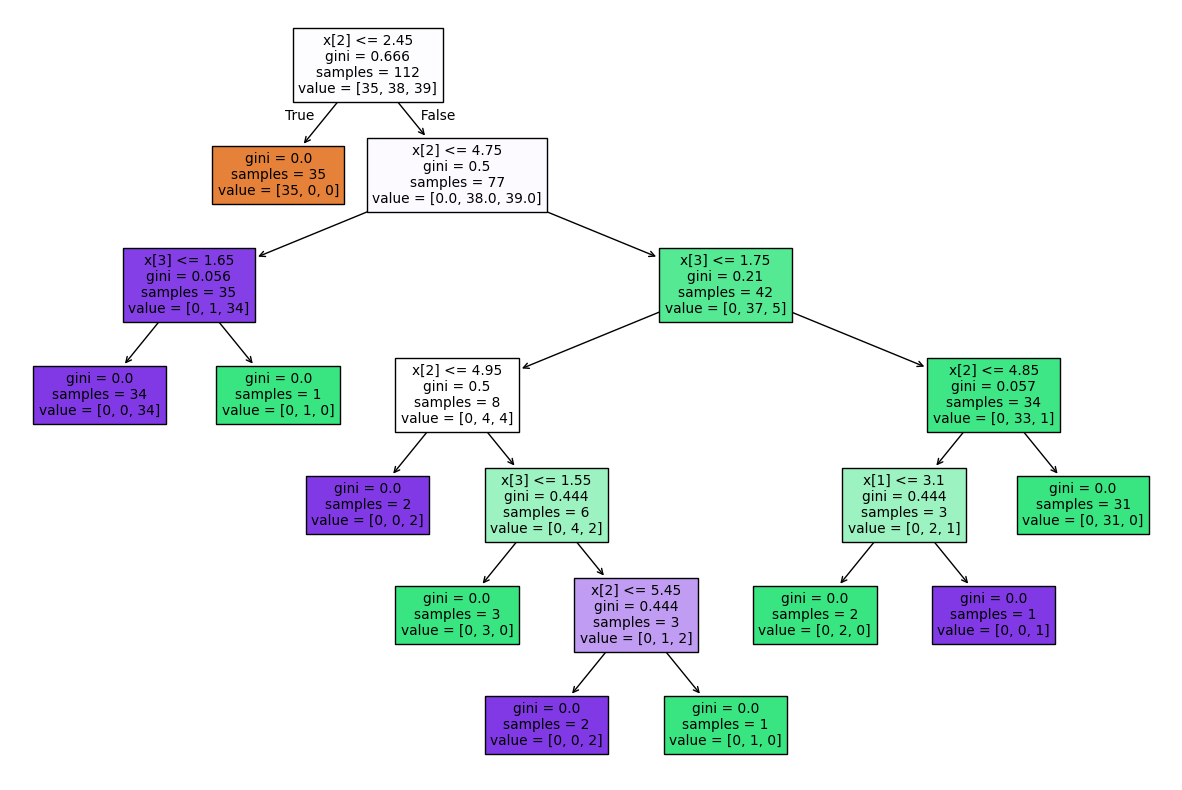

In [13]:
# Plotting tree
plt.figure(figsize= (15,10))
plot_tree(tree, filled =True)
plt.plot()


In [14]:
y_pred = tree.predict(X_test)
y_pred

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

1.0

Accuracy score of 1 means the model is 100% accurate

So we will check using cross validation for overfitting/underfitting

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Cross-validated accuracy: ", scores.mean())


Cross-validated accuracy:  0.9666666666666668


In [24]:
def predict(sepal_length, sepal_width, petal_length, petal_width):
    prediction = tree.predict([[sepal_length, sepal_width, petal_length, petal_width]])
    if prediction == 0:
        print('setosa')
    elif prediction == 1:
        print('virginica')
    else:
        print('versicolor')



In [26]:
# Predicting for the first row
predict(5.1,3.5,1.4,0.2)

setosa


c:\Users\sarod\CodSoft\gitenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
